In [56]:
from data import *
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = read_data()

In [58]:
df.head()

,midblock_sig,lat,lon,signalized_ind,approaches,on_system,dist_near_school_mi,dist_near_hops_mi,transit_stops_025mi_count,sidewalk_lenght_150ft_ft,aadt_lane_major,aadt_lane_minor,a_rural,a_small_urban,a_urbanized,a_large_urban,DVMT_major,lanes_major,lane_width_ft_major,median_width_ft_major,shoulder_width_ft_major,truck_perc_major,f_local_major,f_collector_major,f_arterial_major,f_unknown_major,d_1way_major,d_2way_undiv_major,d_2way_divid_major,DVMT_minor,lanes_minor,lane_width_ft_minor,median_width_ft_minor,truck_perc_minor,f_local_minor,shoulder_width_ft_minor,f_collector_minor,f_arterial_minor,f_unknown_minor,d_1way_minor,d_2way_undiv_minor,d_2way_divid_minor,speed_lim_mph_major,speed_lim_mph_minor,tot_WMT,tot_WMT_pop,tot_WMT_sqmi,tot_crash_count,crash
445541,0,32.311297,-95.475296,0,3,0,0.315879,10.407405,0,0.000000,33.50,33.5,1,0,0,0,7.839,2,10,0,0,3.2,1,0,0,0,0,1,0,16.616,2.0,10.0,0,3.2,1,0.0,0,0,0.0,0,1,0,58.88497,58.88497,783.535014,0.117931,16.115604,0,0
622244,0,29.552815,-98.355664,0,4,1,0.695240,0.446418,0,54.246393,3074.25,2752.0,0,0,0,1,21519.750,4,10,0,0,3.2,0,0,1,0,0,1,0,919.168,2.0,11.0,0,5.2,0,0.0,1,0,0.0,1,0,0,45.00000,45.00000,1068.740458,0.130717,314.913568,0,0
390398,0,31.818200,-93.915619,0,3,1,10.154818,18.641068,0,0.000000,141.50,21.0,1,0,0,0,296.301,2,11,0,3,7.8,0,1,0,0,0,1,0,17.346,2.0,8.0,0,3.2,1,0.0,0,0,0.0,0,1,0,55.00000,58.88497,353.020485,0.111083,1.471815,0,0
624751,0,29.690371,-95.578561,0,4,0,0.399711,2.011987,0,0.000000,556.00,165.0,0,0,0,1,713.904,2,10,0,0,3.2,1,0,0,0,0,1,0,108.570,2.0,10.0,0,3.2,1,0.0,0,0,0.0,0,1,0,58.88497,58.88497,1640.998087,0.208858,1551.210884,2,1
575216,0,33.115606,-96.846708,0,2,0,0.432653,0.923134,0,0.000000,140.00,140.0,0,0,0,1,72.240,2,10,0,0,3.2,1,0,0,0,0,1,0,162.400,2.0,10.0,0,3.2,1,0.0,0,0,0.0,0,1,0,58.88497,58.88497,706.272132,0.153238,288.833264,0,0


In [59]:
X = df.copy()
y = X.pop("tot_crash_count")
X = X.drop(columns=["crash"])

In [60]:
X.dtypes

midblock_sig                   int64
lat                          float64
lon                          float64
signalized_ind                 int64
approaches                     int64
on_system                      int64
dist_near_school_mi          float64
dist_near_hops_mi            float64
transit_stops_025mi_count      int64
sidewalk_lenght_150ft_ft     float64
aadt_lane_major              float64
aadt_lane_minor              float64
a_rural                        int64
a_small_urban                  int64
a_urbanized                    int64
a_large_urban                  int64
DVMT_major                   float64
lanes_major                    int64
lane_width_ft_major            int64
median_width_ft_major          int64
shoulder_width_ft_major        int64
truck_perc_major             float64
f_local_major                  int64
f_collector_major              int64
f_arterial_major               int64
f_unknown_major                int64
d_1way_major                   int64
d

In [61]:
# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

In [62]:
# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == np.int64

In [63]:
discrete_features

midblock_sig                  True
lat                          False
lon                          False
signalized_ind                True
approaches                    True
on_system                     True
dist_near_school_mi          False
dist_near_hops_mi            False
transit_stops_025mi_count     True
sidewalk_lenght_150ft_ft     False
aadt_lane_major              False
aadt_lane_minor              False
a_rural                       True
a_small_urban                 True
a_urbanized                   True
a_large_urban                 True
DVMT_major                   False
lanes_major                   True
lane_width_ft_major           True
median_width_ft_major         True
shoulder_width_ft_major       True
truck_perc_major             False
f_local_major                 True
f_collector_major             True
f_arterial_major              True
f_unknown_major               True
d_1way_major                  True
d_2way_undiv_major            True
d_2way_divid_major  

In [64]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores

aadt_lane_major              0.187499
DVMT_major                   0.149400
aadt_lane_minor              0.115808
speed_lim_mph_major          0.115602
f_local_major                0.099743
DVMT_minor                   0.089964
f_arterial_major             0.089360
lanes_major                  0.082780
tot_WMT_sqmi                 0.057145
signalized_ind               0.051281
lane_width_ft_major          0.050919
speed_lim_mph_minor          0.044393
f_local_minor                0.043741
truck_perc_major             0.041629
tot_WMT                      0.040336
approaches                   0.039342
tot_WMT_pop                  0.033267
lon                          0.033038
lane_width_ft_minor          0.030764
lat                          0.029466
d_2way_undiv_major           0.024680
f_collector_minor            0.022942
f_arterial_minor             0.021281
dist_near_hops_mi            0.021190
lanes_minor                  0.019866
d_2way_divid_major           0.019613
sidewalk_len

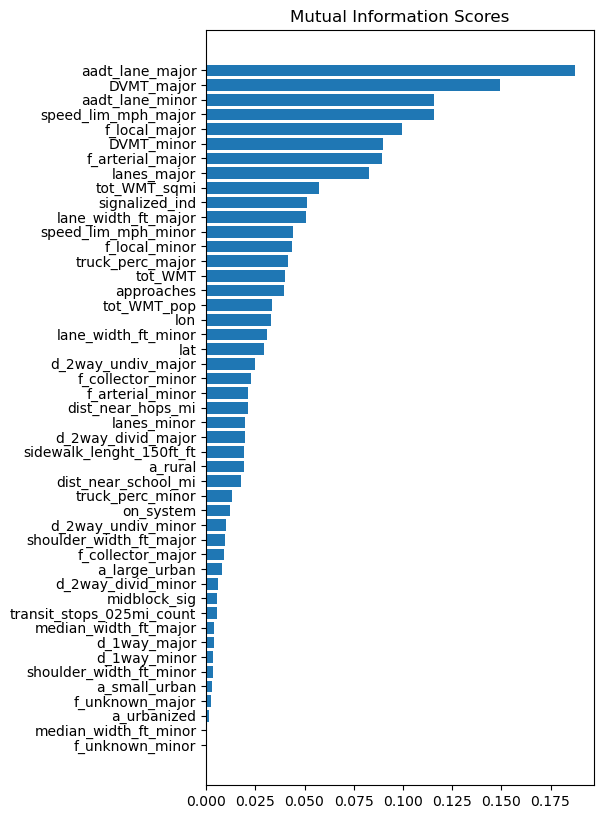

In [65]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(5, 10))
plot_mi_scores(mi_scores)

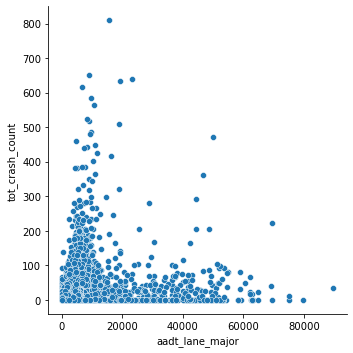

In [50]:
# aadt_lane_major
sns.relplot(x="aadt_lane_major", y="tot_crash_count", data=df);

In [68]:
mi_scores_sorted = mi_scores.sort_values(ascending=False)

In [100]:
def plot_transform(df, col):
    plt.figure(figsize=(8, 4))
    plt.subplot(121)
    plt.hist(df[[col]]);
    plt.title(col);

    plt.subplot(122)
    plt.hist(df[[col]].apply(np.log1p));
    plt.title(col + " log1p");    

In [102]:
# feature engineering
"""
[
0 'aadt_lane_major',      log1p
1 'DVMT_major',           log1p
2 'aadt_lane_minor',      log1p
3 'speed_lim_mph_major',  stay
4 'f_local_major',        factor, stay
5 'DVMT_minor',           log1p
6 'f_arterial_major',     factor, stay
7 'lanes_major',          factor, stay
8 'tot_WMT_sqmi',         log1p
9 'signalized_ind',       factor, stay
10'lane_width_ft_major',  stay
11'speed_lim_mph_minor',  stay
12'f_local_minor',        factor, stay
13'truck_perc_major',     log1p
14'tot_WMT',              log1p
15'approaches',           factor, stay
16'tot_WMT_pop',          stats.boxcox(df.tot_WMT_pop)
17'lon',                  stay
18'lane_width_ft_minor',  stay
19'lat',                  stay

# just try the first 20 features

20'd_2way_undiv_major',   stay, highly imbalance
21'f_collector_minor',    stay
22'f_arterial_minor',     stay, highly imbalance
23'dist_near_hops_mi',    log1p
24'lanes_minor',          stay, highly imbalance
25'd_2way_divid_major',   stay, highly imbalance
26'sidewalk_lenght_150ft_ft', log1p, highly imbalance
27'a_rural',              stay
28'dist_near_school_mi',  stats.boxcox(df.dist_near_school_mi)
29'truck_perc_minor',     log1p, highly imbalance
30'on_system',            factor, stay
31'd_2way_undiv_minor',   factor, stay, highly imbalance
32'shoulder_width_ft_major', stay, highly imbalance
33'f_collector_major',    factor, stay
34'a_large_urban',        factor, stay
35'd_2way_divid_minor',   factor, stay, highly imbalance
36'midblock_sig',         factor, stay, highly imbalance
37'transit_stops_025mi_count', stay, highly imbalance
38'median_width_ft_major', factor, stay, highly imbalance
39'd_1way_major',         factor, stay, highly imbalance
40'd_1way_minor',         factor, stay, highly imbalance
41'shoulder_width_ft_minor', factor, stay, highly imbalance
42'a_small_urban',        factor, stay
43'f_unknown_major',      factor, stay, highly imbalance
44'a_urbanized',          factor, stay
45'median_width_ft_minor',factor, stay, highly imbalance
46'f_unknown_minor'       factor, stay, highly imbalance
]
"""

#df.aadt_lane_major.hist()
#df.aadt_lane_major.apply(np.log1p).hist()
# for Box-Cox Transformation
#from scipy import stats
#stats.boxcox(df.aadt_lane_major) # Data must be positive.

In [183]:
#for i in range(len(mi_scores)):
#    plot_transform(df, mi_scores_sorted.index[i])

In [5]:
corr_matrix = df.corr()
corr_matrix

,midblock_sig,lat,lon,signalized_ind,approaches,on_system,dist_near_school_mi,dist_near_hops_mi,transit_stops_025mi_count,sidewalk_lenght_150ft_ft,aadt_lane_major,aadt_lane_minor,a_rural,a_small_urban,a_urbanized,a_large_urban,DVMT_major,lanes_major,lane_width_ft_major,median_width_ft_major,shoulder_width_ft_major,truck_perc_major,f_local_major,f_collector_major,f_arterial_major,f_unknown_major,d_1way_major,d_2way_undiv_major,d_2way_divid_major,DVMT_minor,lanes_minor,lane_width_ft_minor,median_width_ft_minor,truck_perc_minor,f_local_minor,shoulder_width_ft_minor,f_collector_minor,f_arterial_minor,f_unknown_minor,d_1way_minor,d_2way_undiv_minor,d_2way_divid_minor,speed_lim_mph_major,speed_lim_mph_minor,tot_WMT,tot_WMT_pop,tot_WMT_sqmi,tot_crash_count,crash
midblock_sig,1.000000,-0.017541,0.015115,0.360568,0.051080,0.017646,-0.019745,-0.031549,0.053847,0.027144,0.108314,0.216496,-0.032717,-0.016709,-0.014365,0.048902,0.098831,0.132425,0.021053,0.017829,0.009467,0.001607,-0.075243,-0.005384,0.099020,0.031309,0.023663,-0.122899,0.125214,0.226130,0.218104,0.052900,0.015438,0.011971,-0.146135,0.012234,0.054403,0.202242,0.007341,0.044518,-0.151166,0.165368,-0.066658,-0.120242,0.027166,0.070652,0.059507,0.227812,0.070179
lat,-0.017541,1.000000,-0.214962,-0.019737,0.045596,0.058673,0.111874,0.070186,-0.020292,-0.037172,-0.048871,-0.058400,0.168767,0.014835,0.071269,-0.203888,-0.018966,0.009819,-0.021882,0.003130,0.028500,0.088474,-0.015260,0.024495,-0.005739,-0.001889,-0.012262,0.001184,0.005103,-0.016088,0.000796,-0.066655,0.004488,0.040090,0.000031,0.014577,0.001797,-0.003386,0.000070,-0.002747,0.008034,-0.008428,0.050421,-0.005308,-0.147025,-0.041450,-0.096229,-0.039162,-0.067167
lon,0.015115,-0.214962,1.000000,0.017366,-0.094840,-0.006283,-0.051075,-0.042354,-0.017892,-0.030306,0.031597,0.031976,-0.070873,-0.047498,0.020284,0.081462,0.033251,0.004095,-0.006824,-0.001018,-0.013187,-0.076469,-0.003525,0.002252,0.002630,-0.001578,0.000489,-0.041267,0.045954,0.017129,0.019184,0.044637,0.001301,-0.037997,-0.003113,-0.001669,-0.000289,0.007102,-0.000375,-0.001960,-0.022553,0.032827,-0.030916,-0.012589,0.169018,0.099312,0.041136,0.009711,-0.012045
signalized_ind,0.360568,-0.019737,0.017366,1.000000,0.134356,0.095303,-0.056838,-0.079660,0.125558,0.157442,0.221502,0.446454,-0.079374,-0.015171,0.000055,0.080437,0.179186,0.320394,0.093757,0.044992,0.057569,0.018230,-0.206534,-0.019091,0.289259,0.030747,0.089902,-0.203189,0.180391,0.391062,0.388493,0.203391,0.052091,0.054150,-0.385454,0.093459,0.230094,0.371946,0.028411,0.163955,-0.280880,0.230247,-0.223951,-0.274989,0.022450,0.110719,0.092991,0.512081,0.222471
approaches,0.051080,0.045596,-0.094840,0.134356,1.000000,0.170800,-0.028788,0.013252,0.042959,0.119855,0.244273,0.149105,0.050016,0.077857,0.057435,-0.130915,0.125521,0.152003,0.149456,0.111920,0.164566,0.122003,-0.247283,0.103382,0.174196,0.189283,0.076213,-0.175435,0.156490,0.113271,0.089358,0.080854,0.029154,0.054738,-0.174615,0.082477,0.126192,0.123003,0.033628,0.086565,-0.108787,0.067310,-0.134139,-0.118260,-0.158738,-0.006227,0.031423,0.148067,0.256191
on_system,0.017646,0.058673,-0.006283,0.095303,0.170800,1.000000,0.260502,0.260526,-0.029728,0.377287,0.308276,0.137240,0.322176,0.030649,-0.030269,-0.287672,0.103264,0.181723,0.301859,0.123629,0.709942,0.647850,-0.603600,0.327910,0.408890,0.178902,0.138369,-0.120599,0.062496,0.069174,0.037604,-0.056945,0.045915,0.217053,-0.253933,0.213644,0.209526,0.126138,0.068798,0.146831,-0.129400,0.038474,-0.147670,-0.125690,-0.159055,-0.179217,-0.218495,0.121334,0.140679
dist_near_school_mi,-0.019745,0.111874,-0.051075,-0.056838,-0.028788,0.260502,1.000000,0.532125,-0.049353,-0.064773,-0.086500,-0.098024,0.576066,-0.104575,-0.112522,-0.374071,-0.043654,-0.116667,-0.152246,-0.001483,0.136105,0.269105,-0.068734,0.130508,-0.046576,-0.013453,-0.036122,0.071180,-0.060767,-0.034527,-0.040861,-0.345741,-0.002086,0.121552,-0.020660,0.046117,0.039567,-0.030431,0.002644,-0.015978,0.028565,-0.024076,0.21

In [14]:
#sn.heatmap(corr_matrix, annot=True)
#plt.show()
corr_matrix.to_csv("data/corr_matrix.csv")

In [12]:
corr_matrix > 0.5

,midblock_sig,lat,lon,signalized_ind,approaches,on_system,dist_near_school_mi,dist_near_hops_mi,transit_stops_025mi_count,sidewalk_lenght_150ft_ft,aadt_lane_major,aadt_lane_minor,a_rural,a_small_urban,a_urbanized,a_large_urban,DVMT_major,lanes_major,lane_width_ft_major,median_width_ft_major,shoulder_width_ft_major,truck_perc_major,f_local_major,f_collector_major,f_arterial_major,f_unknown_major,d_1way_major,d_2way_undiv_major,d_2way_divid_major,DVMT_minor,lanes_minor,lane_width_ft_minor,median_width_ft_minor,truck_perc_minor,f_local_minor,shoulder_width_ft_minor,f_collector_minor,f_arterial_minor,f_unknown_minor,d_1way_minor,d_2way_undiv_minor,d_2way_divid_minor,speed_lim_mph_major,speed_lim_mph_minor,tot_WMT,tot_WMT_pop,tot_WMT_sqmi,tot_crash_count,crash
midblock_sig,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
lat,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
lon,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
signalized_ind,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
approaches,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
on_system,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
dist_near_school_mi,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
dist_near_hops_mi,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
transit_stops_025mi_count,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sidewalk_lenght_150ft_ft,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
